In [80]:
#libries
#pip install pydicom nibabel dicom2nifti matplotlib

import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pydicom
import dicom2nifti


## Modality Number 1

In [81]:
def dicom_to_nifti_with_metadata(input_folder, output_nifti_path, output_metadata_path):
    """
    Converts a DICOM folder to NIfTI and extracts all metadata to a JSON file.

    Args:
        input_folder (str): Path to the folder containing DICOM files (.dcm)
        output_nifti_path (str): Path and name for the output NIfTI file (.nii)
        output_metadata_path (str): Path and name for the output metadata JSON file
    """
    # Convert DICOM to NIfTI
    dicom2nifti.convert_directory(input_folder, os.path.dirname(output_nifti_path), compression=False, reorient=True)
    # Rename the generated file (if necessary)
    for file in os.listdir(os.path.dirname(output_nifti_path)):
        if file.endswith('.nii'):
            os.rename(os.path.join(os.path.dirname(output_nifti_path), file), output_nifti_path)
            break

    # Extract metadata from all DICOM files
    metadata = []
    for filename in os.listdir(input_folder):
        if filename.lower().endswith('.dcm'):
            ds = pydicom.dcmread(os.path.join(input_folder, filename))
            # Convert the dataset to a serializable dictionary
            meta_dict = {elem.keyword: elem.value for elem in ds if elem.keyword}
            metadata.append(meta_dict)
    # Save metadata to a JSON file
    with open(output_metadata_path, 'w') as f:
        json.dump(metadata, f, indent=4, default=str)

# Example usage:
dicom_to_nifti_with_metadata(
    '/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/1_RAW/Modalidad1/201',
    '/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/2_NIFTI/Modalidad_1.nii',
    '/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/3_METADATA/metadata_1.json'
)

In [82]:
def get_modality_from_metadata(metadata):
    """
    Returns the image modality from the extracted metadata.
    Args:
        metadata (dict): Dictionary with DICOM metadata
    Returns:
        str: Image modality
    """
    return metadata.get("Modality", "Unknown")

# Example usage:
import json
with open('/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/3_METADATA/metadata_1.json') as f:
    metadata_list = json.load(f)
modality = get_modality_from_metadata(metadata_list[0])
print(modality)

MR


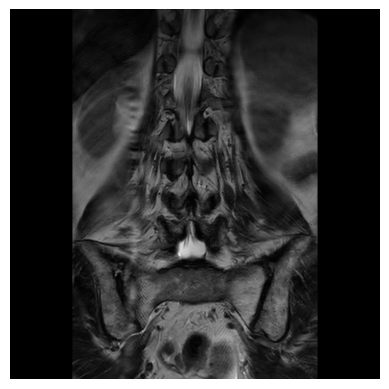

In [83]:
def show_slice(nifti_file):
    img = nib.load(nifti_file)
    data = img.get_fdata()
    slice_ = data[:, data.shape[1] // 2, :]
    plt.imshow(np.rot90(slice_), cmap='gray')
    plt.axis('off')
    plt.show()

# Example usage:
show_slice('/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/2_NIFTI/Modalidad_1.nii')

## Modality Number 2

In [84]:
import pydicom

def get_modality_from_dicom(dicom_path):
    ds = pydicom.dcmread(dicom_path)
    return ds.get("Modality", "Unknown")

# Example usage:
dicom_file = '/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/1_RAW/Modalidad2/ScalarVolume_13/IMG0001.dcm'
modality = get_modality_from_dicom(dicom_file)
print(modality)

CR


## To convert Computed Radiography (CR) DICOM images to NIfTI is imposible

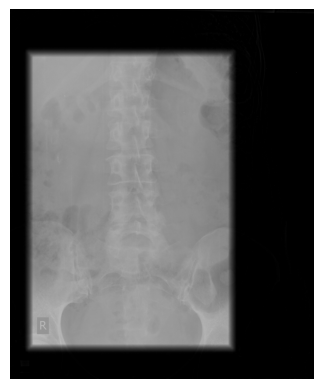

In [85]:
def show_dicom_image(dicom_path):
    ds = pydicom.dcmread(dicom_path)
    plt.imshow(ds.pixel_array, cmap='gray')
    plt.axis('off')
    plt.show()

# Example usage:
show_dicom_image('/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/1_RAW/Modalidad2/ScalarVolume_13/IMG0001.dcm')

## Modality Number 3

In [86]:
import os
import json
import pydicom
import dicom2nifti

def dicom_to_nifti_with_metadata(input_folder, output_nifti_path, output_metadata_path):
    """
    Converts a DICOM folder to NIfTI and extracts all metadata to a JSON file.

    Args:
        input_folder (str): Path to the folder containing DICOM files (.dcm)
        output_nifti_path (str): Path and name for the output NIfTI file (.nii)
        output_metadata_path (str): Path and name for the output metadata JSON file
    """
    output_dir = os.path.dirname(output_nifti_path)
    # List existing NIfTI files before conversion
    existing_nii = set(f for f in os.listdir(output_dir) if f.endswith('.nii') or f.endswith('.nii.gz'))

    # Convert DICOM to NIfTI
    dicom2nifti.convert_directory(input_folder, output_dir, compression=False, reorient=True)

    # Find the new NIfTI file(s) by comparing to before
    new_nii = [f for f in os.listdir(output_dir) if (f.endswith('.nii') or f.endswith('.nii.gz')) and f not in existing_nii]
    if not new_nii:
        raise FileNotFoundError("No new NIfTI file was created by dicom2nifti.")
    # If more than one, pick the most recently created
    new_nii.sort(key=lambda x: os.path.getctime(os.path.join(output_dir, x)), reverse=True)
    generated_nii = os.path.join(output_dir, new_nii[0])
    if generated_nii != output_nifti_path:
        os.rename(generated_nii, output_nifti_path)

    # Extract metadata from all DICOM files
    metadata = []
    for filename in os.listdir(input_folder):
        if filename.lower().endswith('.dcm'):
            ds = pydicom.dcmread(os.path.join(input_folder, filename))
            meta_dict = {elem.keyword: elem.value for elem in ds if elem.keyword}
            metadata.append(meta_dict)
    # Save metadata to a JSON file
    os.makedirs(os.path.dirname(output_metadata_path), exist_ok=True)
    with open(output_metadata_path, 'w') as f:
        json.dump(metadata, f, indent=4, default=str)

# Example usage:
dicom_to_nifti_with_metadata(
    '/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/1_RAW/Modalidad3/ScalarVolume_27',
    '/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/2_NIFTI/Modalidad_3.nii',
    '/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/3_METADATA/metadata_3.json'
)

In [87]:
def get_modality_from_metadata(metadata):
    """
    Returns the image modality from the extracted metadata.
    Args:
        metadata (dict): Dictionary with DICOM metadata
    Returns:
        str: Image modality
    """
    return metadata.get("Modality", "Unknown")

# Example usage:
import json
with open('/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/3_METADATA/metadata_3.json') as f:
    metadata_list = json.load(f)
modality = get_modality_from_metadata(metadata_list[0])
print(modality)

CT


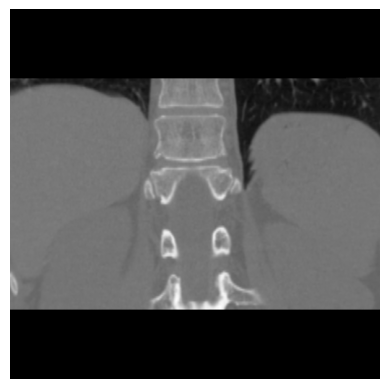

In [89]:
def show_nifti_coronal_slice(nifti_path):
    img = nib.load(nifti_path)
    data = img.get_fdata()
    # Get voxel spacing from the header
    zooms = img.header.get_zooms()
    # Show the central coronal slice (Y axis)
    slice_index = data.shape[1] // 2
    slice_ = data[:, slice_index, :]
    # Calculate aspect ratio: z/x
    aspect = zooms[2] / zooms[0]
    plt.imshow(np.rot90(slice_), cmap='gray', aspect=aspect)
    plt.axis('off')
    plt.show()

# Example usage:
show_nifti_coronal_slice('/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/2_NIFTI/Modalidad_3.nii')

## Comparative Study of difference between modalities

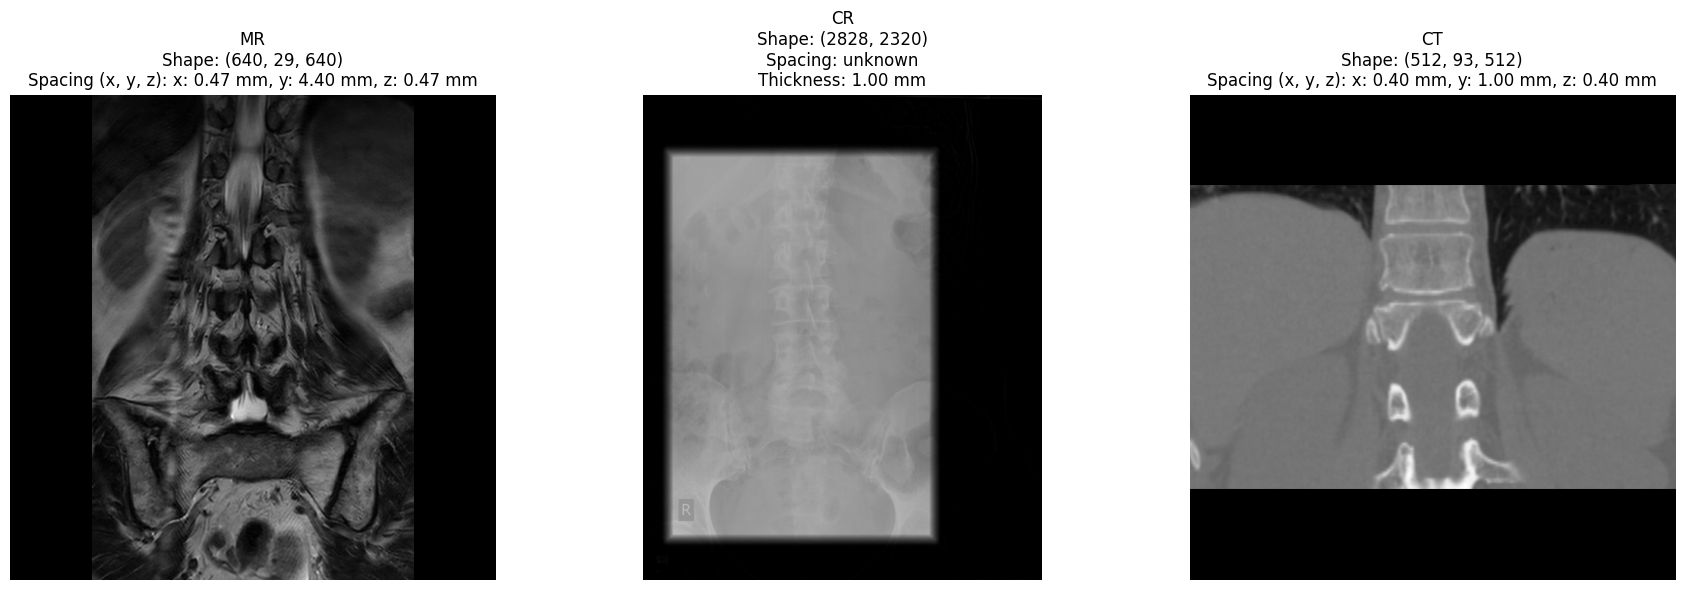

In [92]:
import nibabel as nib
import pydicom
import matplotlib.pyplot as plt
import numpy as np

def format_spacing(spacing, names=None):
    """Format spacing tuple/list with units and optional axis names."""
    if names is None:
        names = ["x", "y", "z"]
    return ', '.join(f"{n}: {s:.2f} mm" for n, s in zip(names, spacing))

def show_three_images_with_resolution(nifti_path1, dicom_path, nifti_path2):
    # First NIfTI (coronal slice)
    img1 = nib.load(nifti_path1)
    data1 = img1.get_fdata()
    zooms1 = img1.header.get_zooms()
    slice_index1 = data1.shape[1] // 2
    slice1 = data1[:, slice_index1, :]
    aspect1 = zooms1[2] / zooms1[0]
    title1 = (
        f'MR\n'
        f'Shape: {data1.shape}\n'
        f'Spacing (x, y, z): {format_spacing(zooms1)}'
    )

    # DICOM image
    ds = pydicom.dcmread(dicom_path)
    dicom_img = ds.pixel_array
    spacing = ds.get("PixelSpacing", [None, None])
    spacing_str = (
        f"x: {float(spacing[0]):.2f} mm, y: {float(spacing[1]):.2f} mm"
        if spacing[0] is not None and spacing[1] is not None
        else "unknown"
    )
    thickness = ds.get("SliceThickness", None)
    thickness_str = f"{float(thickness):.2f} mm" if thickness is not None else "unknown"
    title2 = (
        f'CR\n'
        f'Shape: {dicom_img.shape}\n'
        f'Spacing: {spacing_str}\n'
        f'Thickness: {thickness_str}'
    )

    # Second NIfTI (coronal slice)
    img2 = nib.load(nifti_path2)
    data2 = img2.get_fdata()
    zooms2 = img2.header.get_zooms()
    slice_index2 = data2.shape[1] // 2
    slice2 = data2[:, slice_index2, :]
    aspect2 = zooms2[2] / zooms2[0]
    title3 = (
        f'CT\n'
        f'Shape: {data2.shape}\n'
        f'Spacing (x, y, z): {format_spacing(zooms2)}'
    )

    # Plot all three
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(np.rot90(slice1), cmap='gray', aspect=aspect1)
    axes[0].set_title(title1)
    axes[0].axis('off')

    axes[1].imshow(dicom_img, cmap='gray')
    axes[1].set_title(title2)
    axes[1].axis('off')

    axes[2].imshow(np.rot90(slice2), cmap='gray', aspect=aspect2)
    axes[2].set_title(title3)
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
show_three_images_with_resolution(
    '/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/2_NIFTI/Modalidad_1.nii',
    '/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/1_RAW/Modalidad2/ScalarVolume_13/IMG0001.dcm',
    '/home/jp/Repositorios/Digital_Image_Processing-1/Practice1/point2/data/2_NIFTI/Modalidad_3.nii'
)

## Análisis Comparativo de Imágenes Médicas: MR, CR y CT

### 1. Imagen MR (Resonancia Magnética)

- **Forma:** `(640, 29, 640)`
- **Espaciado:**  
  - **x:** 0.47 mm  
  - **y:** 4.40 mm  
  - **z:** 0.47 mm
- **Descripción:**  
  Imagen volumétrica con alta resolución en los ejes x y z, pero menor resolución entre cortes (eje y). Esto es típico en resonancia magnética para reducir tiempo de adquisición. Excelente para visualizar tejidos blandos y detalles anatómicos internos.

---

### 2. Imagen CR (Radiografía Computarizada)

- **Forma:** `(2328, 2320)`
- **Espaciado:** desconocido  
- **Grosor de corte:** 1.00 mm
- **Descripción:**  
  Imagen 2D (radiografía plana). El espaciado de píxel no está disponible, lo cual es común en algunos equipos de rayos X digitales. El grosor de corte suele ser un valor por defecto. Es útil para evaluaciones rápidas de estructuras óseas y tórax.

---

### 3. Imagen CT (Tomografía Computarizada)

- **Forma:** `(512, 93, 512)`
- **Espaciado:**  
  - **x:** 0.40 mm  
  - **y:** 1.00 mm  
  - **z:** 0.40 mm
- **Descripción:**  
  Imagen volumétrica con excelente resolución en los ejes x y z, y resolución moderada entre cortes (eje y). Permite reconstrucciones multiplanares y es ideal para el estudio de huesos y tejidos densos.

---

### Comparación General

| Modalidad | Dimensionalidad | Resolución | Utilidad Clínica | Visualización |
|-----------|-----------------|------------|------------------|--------------|
| **MR**    | 3D              | Alta en plano, baja entre cortes | Tejidos blandos, neurología, músculo-esquelético | Multiplanar, volumétrica |
| **CR**    | 2D              | Variable, a veces desconocida    | Evaluación inicial, huesos, tórax                | Solo en el plano         |
| **CT**    | 3D              | Alta y uniforme                  | Huesos, pulmones, emergencias                    | Multiplanar, volumétrica |

---

### Conclusión

Cada modalidad tiene ventajas y limitaciones:

- **MR:** Ideal para tejidos blandos y estudios detallados internos.
- **CT:** Excelente para huesos y estudios rápidos de emergencia.
- **CR:** Fundamental para diagnósticos iniciales y seguimientos rápidos.

La elección de la modalidad depende de la necesidad clínica y el tipo de información anatómica requerida.

---